# DA Mini Project
* 주제 : 온라인 학습 플랫폼 사용자 행동 패턴 분석
* 개요 :
```
이번 프로젝트는 학습 서비스를 이용하는 독자들 중 누가 서비스 구독을 연장할지 예측하기 위한 사전 파악에 초점을 맞추고 있습니다. 우리의 목표는 유저들의 학습 습관, 선호도, 이용 행태 등 다양한 측면을 면밀히 분석하는 것입니다.


이를 위해, 우리는 유저들의 학습 패턴, 서비스 이용 시간, 콘텐츠에 대한 반응, 그리고 이들이 얼마나 자주 서비스를 이용하는지 등 다양한 데이터를 수집하고 분석할 계획입니다. 이 데이터는 유저들이 서비스에 얼마나 만족하고 있는지, 어떤 요소들이 그들의 구독 결정에 영향을 미치는지 이해하는 데 중요한 역할을 할 것입니다.
```
* 데이터셋 : mini.csv
    * 메타데이터
        * user_id: 사용자의 고유 식별자
        * subscription_duration: 사용자가 서비스에 가입한 기간 (월)
        * recent_login_time: 사용자가 마지막으로 로그인한 시간 (일)
        * average_login_time:  사용자의 일반적인 로그인 시간
        * average_time_per_learning_session: 각 학습 세션에 소요된 평균 시간 (분)
        * monthly_active_learning_days: 월간 활동적인 학습 일수
        * total_completed_courses: 완료한 총 코스 수
        * recent_learning_achievement: 최근 학습 성취도
        * abandoned_learning_sessions: 중단된 학습 세션 수
        * community_engagement_level: 커뮤니티 참여도
        * preferred_difficulty_level: 선호하는 난이도
        * subscription_type: 구독 유형
        * customer_inquiry_history: 고객 문의 이력
        * payment_pattern : 사용자의 지난 3개월 간의 결제 패턴을 10진수로 표현한 값.
          - 7: 3개월 모두 결제함
          - 6: 첫 2개월은 결제했으나 마지막 달에는 결제하지 않음
          - 5: 첫 달과 마지막 달에 결제함
          - 4: 첫 달에만 결제함
          - 3: 마지막 2개월에 결제함
          - 2: 가운데 달에만 결제함
          - 1: 마지막 달에만 결제함
          - 0: 3개월 동안 결제하지 않음
        * target: 사용자가 다음 달에도 구독을 계속할지 (1) 또는 취소할지 (0)를 나타냄

In [7]:
import pandas as pd

In [8]:
access_data = pd.read_table('mini.csv',sep=',')

In [9]:
access_data.head()

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1


In [10]:
access_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   user_id                            10000 non-null  object 
 1   subscription_duration              10000 non-null  int64  
 2   recent_login_time                  10000 non-null  int64  
 3   average_login_time                 10000 non-null  float64
 4   average_time_per_learning_session  10000 non-null  float64
 5   monthly_active_learning_days       10000 non-null  int64  
 6   total_completed_courses            10000 non-null  int64  
 7   recent_learning_achievement        10000 non-null  float64
 8   abandoned_learning_sessions        10000 non-null  int64  
 9   community_engagement_level         10000 non-null  int64  
 10  preferred_difficulty_level         10000 non-null  object 
 11  subscription_type                  10000 non-null  obje

In [11]:
access_data.describe()

,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,customer_inquiry_history,payment_pattern,target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,11.897400,15.013200,14.994076,54.917720,12.545400,12.227500,75.029513,3.043600,3.886100,2.010500,3.502900,0.619900
std,6.600896,8.362573,3.001869,56.024310,6.932239,3.634125,9.968529,1.755052,1.262175,1.420983,2.311261,0.485435
min,1.000000,1.000000,2.366189,0.011515,1.000000,1.000000,35.941755,0.000000,1.000000,0.000000,0.000000,0.000000
25%,6.000000,8.000000,13.025597,15.276611,7.000000,10.000000,68.278054,2.000000,3.000000,1.000000,1.000000,0.000000
50%,12.000000,15.000000,14.979228,37.578818,13.000000,12.000000,75.126061,3.000000,4.000000,2.000000,4.000000,1.000000
75%,18.000000,22.000000,16.995340,75.584200,19.000000,15.000000,81.718976,4.000000,5.000000,3.000000,6.000000,1.000000
max,23.000000,29.000000,26.998490,503.372616,24.000000,27.000000,112.643828,12.000000,5.000000,10.000000,7.000000,1.000000


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [16]:

# 데이터 프레임 정의 (실제 데이터프레임의 변수명에 따라 수정해야 함)
data = pd.read_csv('mini.csv')


In [17]:
import koreanize_matplotlib


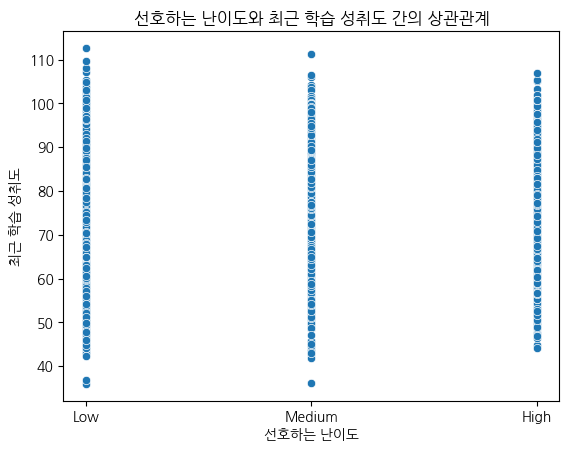

In [18]:

# 선호하는 난이도와 학습 성취도의 상관관계 시각화
sns.scatterplot(x='preferred_difficulty_level', y='recent_learning_achievement', data=data)
plt.title('선호하는 난이도와 최근 학습 성취도 간의 상관관계')
plt.xlabel("선호하는 난이도")
plt.ylabel("최근 학습 성취도")
plt.show()


In [19]:
# 선호하는 난이도를 숫자로 변환
data['preferred_difficulty_level'] = data['preferred_difficulty_level'].map({'Low': 0, 'Medium': 1, 'High': 2})

# 상관 계수 계산
correlation = data['preferred_difficulty_level'].corr(data['recent_learning_achievement'])
print(f'Correlation coefficient: {correlation}')


Correlation coefficient: -0.004939650938796068


In [20]:
low_achievement_high_difficulty = data[(data['preferred_difficulty_level'] == 'High') & (data['recent_learning_achievement'] < threshold)]


NameError: name 'threshold' is not defined

In [21]:
# 임계값 설정
threshold = 0.5

# 선호하는 난이도가 높은데도 학습 성취도가 낮은 고객 식별
low_achievement_high_difficulty = data[(data['preferred_difficulty_level'] == 'High') & (data['recent_learning_achievement'] < threshold)]


In [22]:
print(low_achievement_high_difficulty.describe())


       subscription_duration  recent_login_time  average_login_time  \
count                    0.0                0.0                 0.0   
mean                     NaN                NaN                 NaN   
std                      NaN                NaN                 NaN   
min                      NaN                NaN                 NaN   
25%                      NaN                NaN                 NaN   
50%                      NaN                NaN                 NaN   
75%                      NaN                NaN                 NaN   
max                      NaN                NaN                 NaN   

       average_time_per_learning_session  monthly_active_learning_days  \
count                                0.0                           0.0   
mean                                 NaN                           NaN   
std                                  NaN                           NaN   
min                                  NaN                        

In [23]:
# 데이터프레임의 처음 몇 행 출력
print(data.head())


    user_id  subscription_duration  recent_login_time  average_login_time  \
0  b919c29d                     13                 14           14.946163   
1  a0a60abb                     16                 18           18.453224   
2  b9f171ae                     22                  1           16.195228   
3  5dc0ba8b                      1                 19           17.628656   
4  65c83654                      4                  5           21.390656   

   average_time_per_learning_session  monthly_active_learning_days  \
0                           8.427187                            18   
1                          72.646087                            16   
2                          21.774492                            13   
3                          42.659066                            19   
4                          30.744287                            19   

   total_completed_courses  recent_learning_achievement  \
0                       16                    68.360455  

In [24]:
# 데이터프레임 정보 출력
data.info()

# 결측치 확인
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   user_id                            10000 non-null  object 
 1   subscription_duration              10000 non-null  int64  
 2   recent_login_time                  10000 non-null  int64  
 3   average_login_time                 10000 non-null  float64
 4   average_time_per_learning_session  10000 non-null  float64
 5   monthly_active_learning_days       10000 non-null  int64  
 6   total_completed_courses            10000 non-null  int64  
 7   recent_learning_achievement        10000 non-null  float64
 8   abandoned_learning_sessions        10000 non-null  int64  
 9   community_engagement_level         10000 non-null  int64  
 10  preferred_difficulty_level         10000 non-null  int64  
 11  subscription_type                  10000 non-null  obje

user_id                              0
subscription_duration                0
recent_login_time                    0
average_login_time                   0
average_time_per_learning_session    0
monthly_active_learning_days         0
total_completed_courses              0
recent_learning_achievement          0
abandoned_learning_sessions          0
community_engagement_level           0
preferred_difficulty_level           0
subscription_type                    0
customer_inquiry_history             0
payment_pattern                      0
target                               0
dtype: int64

In [25]:
print(low_achievement_high_difficulty.describe())


       subscription_duration  recent_login_time  average_login_time  \
count                    0.0                0.0                 0.0   
mean                     NaN                NaN                 NaN   
std                      NaN                NaN                 NaN   
min                      NaN                NaN                 NaN   
25%                      NaN                NaN                 NaN   
50%                      NaN                NaN                 NaN   
75%                      NaN                NaN                 NaN   
max                      NaN                NaN                 NaN   

       average_time_per_learning_session  monthly_active_learning_days  \
count                                0.0                           0.0   
mean                                 NaN                           NaN   
std                                  NaN                           NaN   
min                                  NaN                        

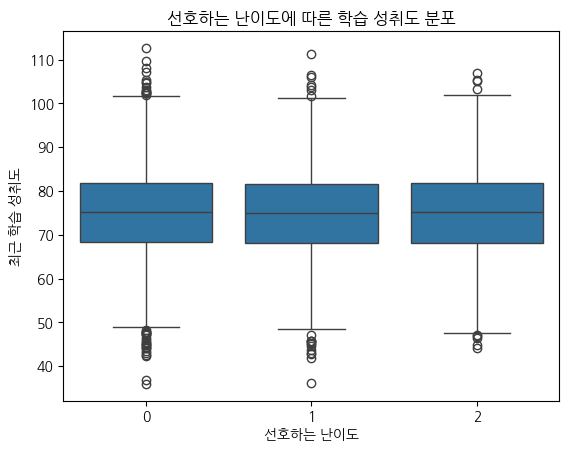

In [26]:
sns.boxplot(x='preferred_difficulty_level', y='recent_learning_achievement', data=data)
plt.title('선호하는 난이도에 따른 학습 성취도 분포')
plt.xlabel('선호하는 난이도')
plt.ylabel('최근 학습 성취도')
plt.show()


In [27]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('변수 간 상관관계 히트맵')
plt.show()


ValueError: could not convert string to float: 'b919c29d'

In [28]:
sns.pairplot(data, hue='preferred_difficulty_level')
plt.suptitle('산점도 행렬')
plt.show()


KeyboardInterrupt: 

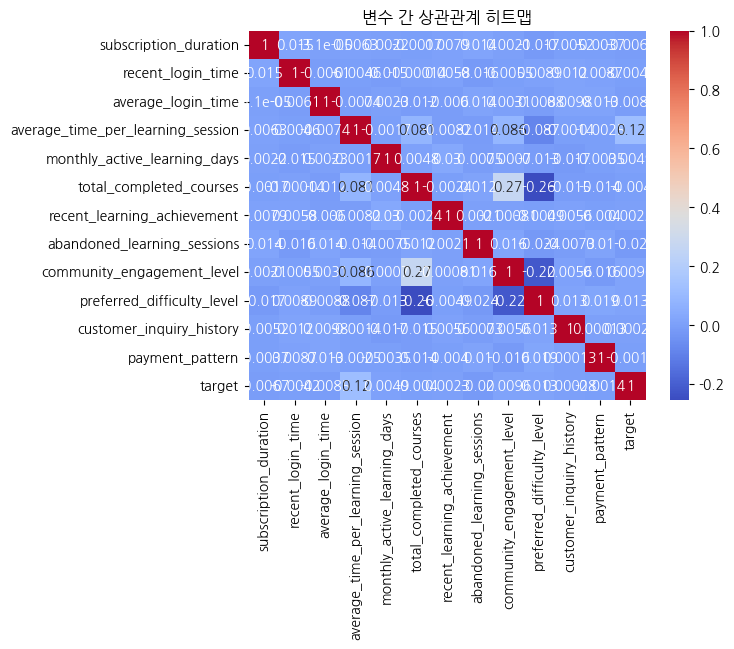

In [29]:
# 문자열 열을 제외한 데이터프레임 생성
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# 상관관계 히트맵 생성
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('변수 간 상관관계 히트맵')
plt.show()


KeyboardInterrupt: 

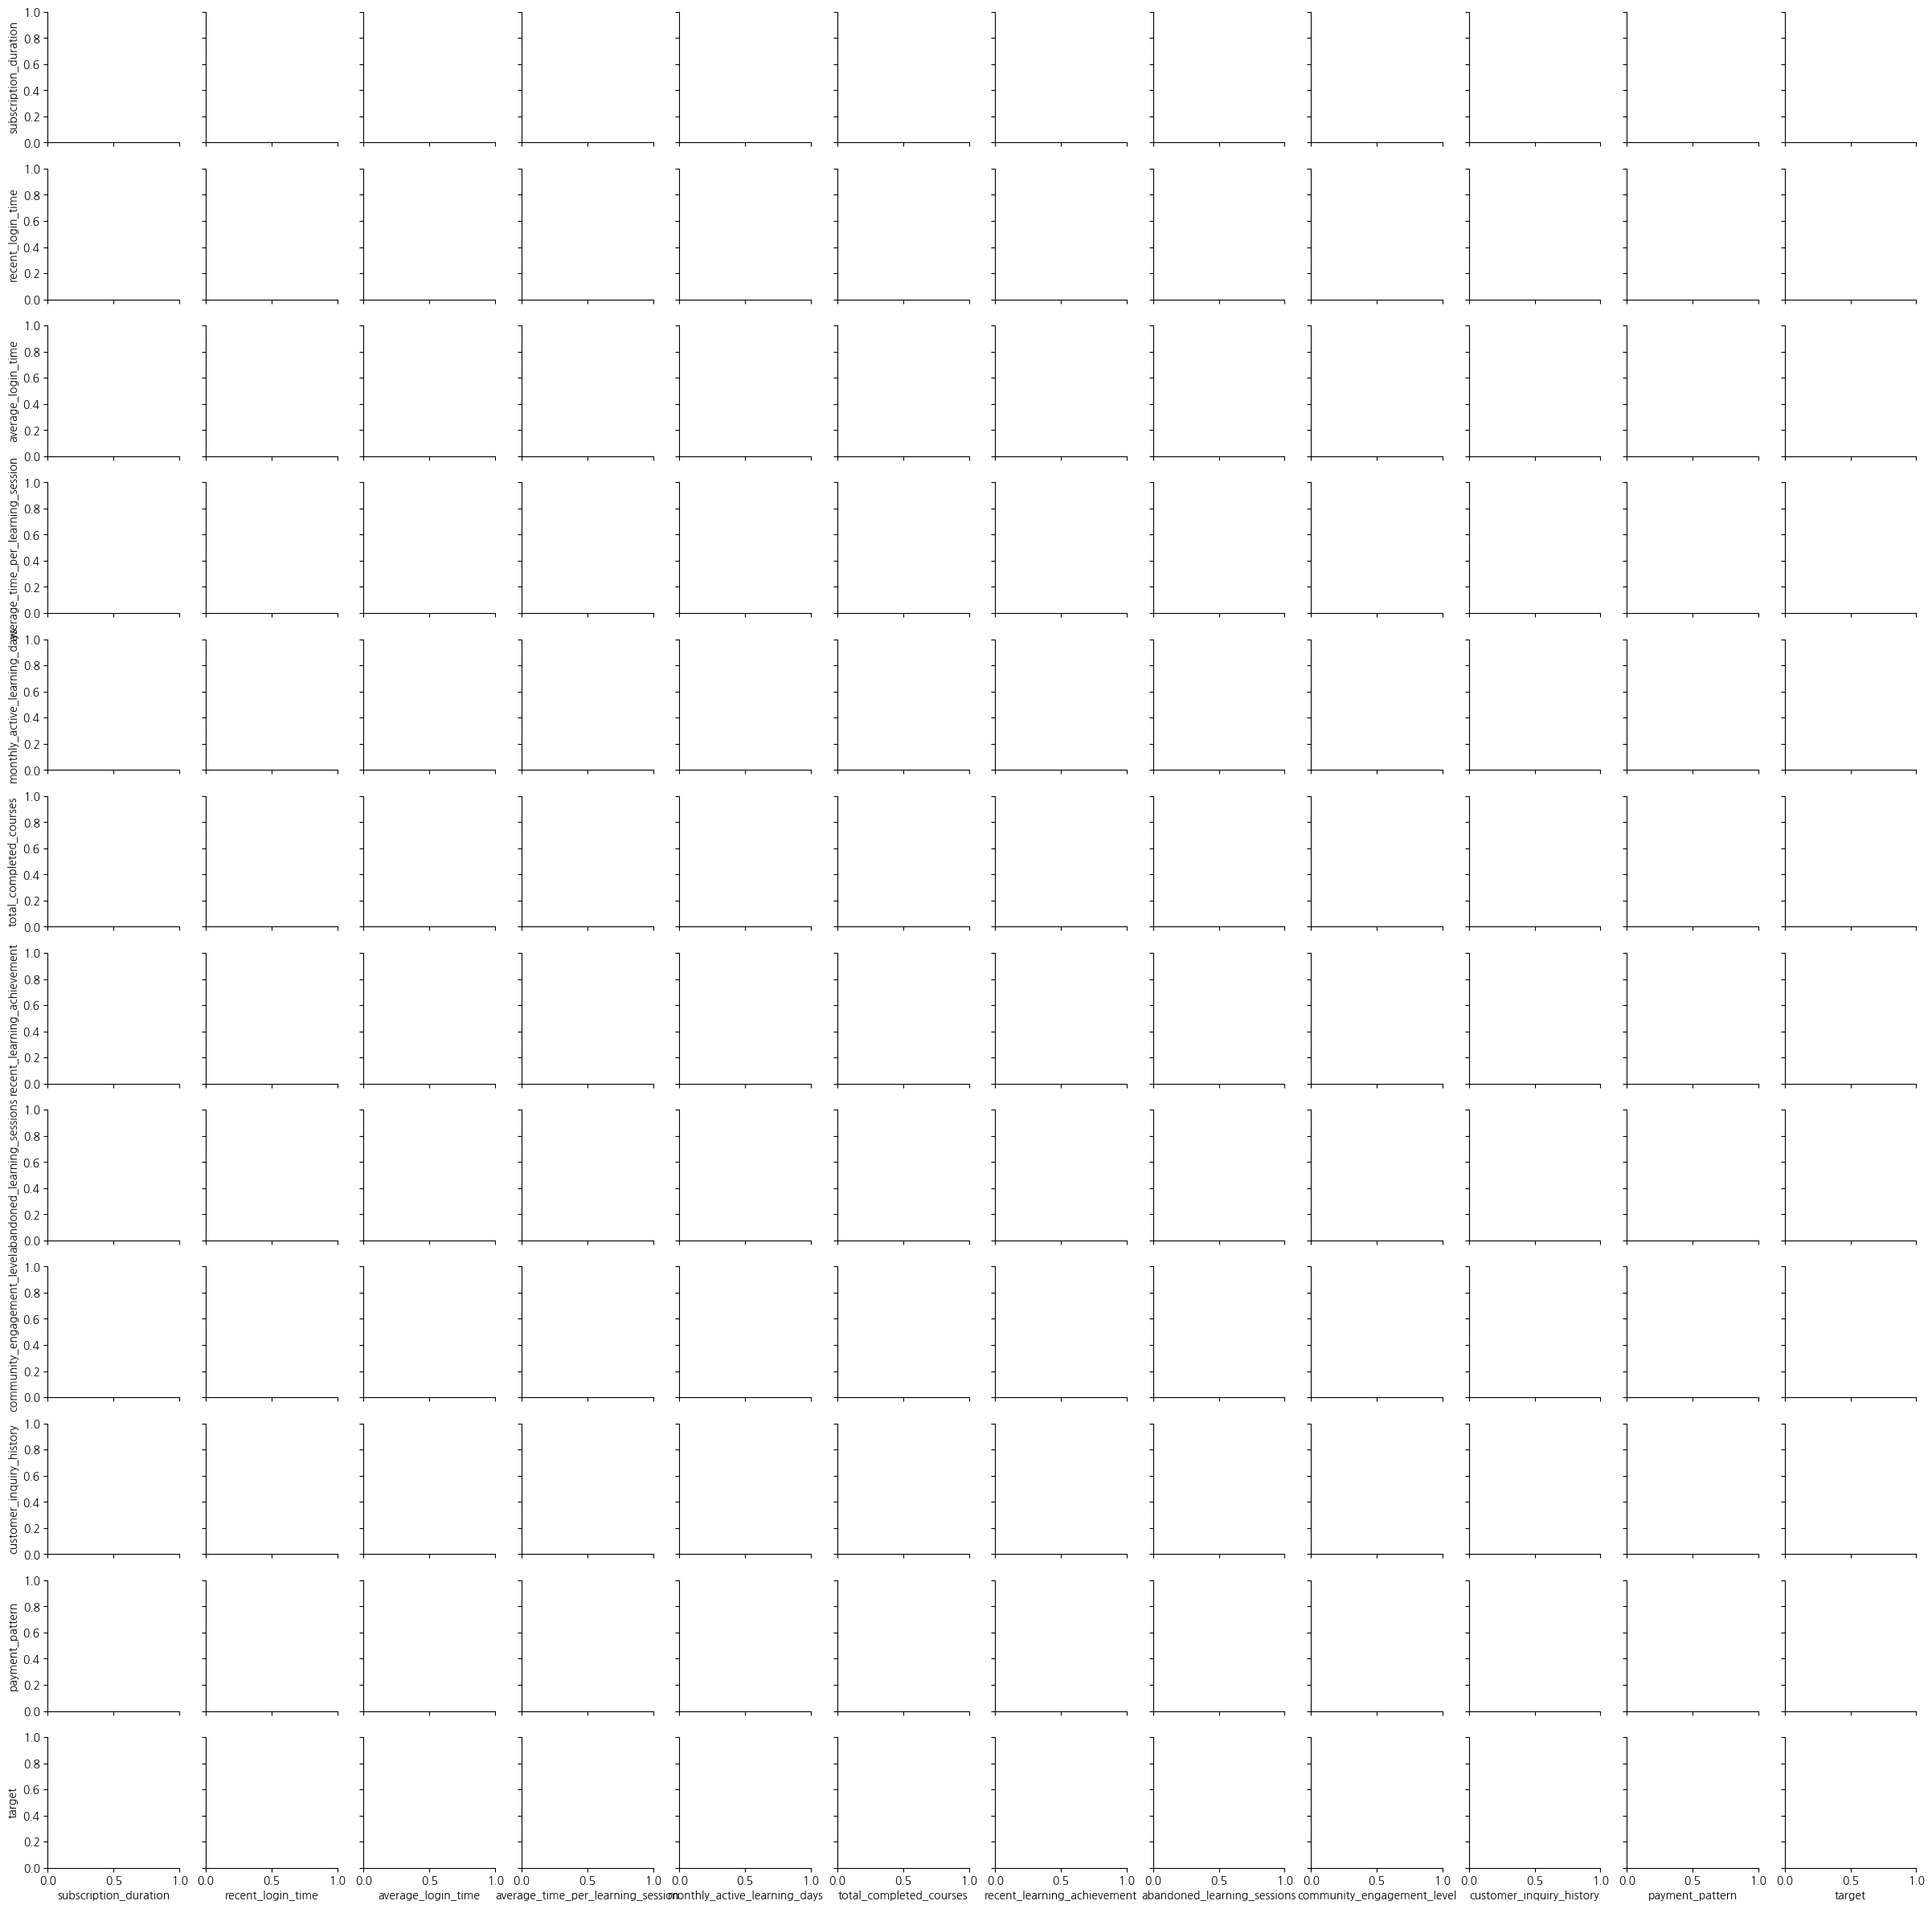

In [30]:
sns.pairplot(data, hue='preferred_difficulty_level')
plt.suptitle('산점도 행렬')
plt.show()


In [ ]:
sns.scatterplot(x='preferred_difficulty_level', y='total_completed_courses', data=data)
plt.title('선호 난이도와 강의 완료도의 상관관계')
plt.xlabel('선호 난이도')
plt.ylabel('완료한 총 코스 수')
plt.show()


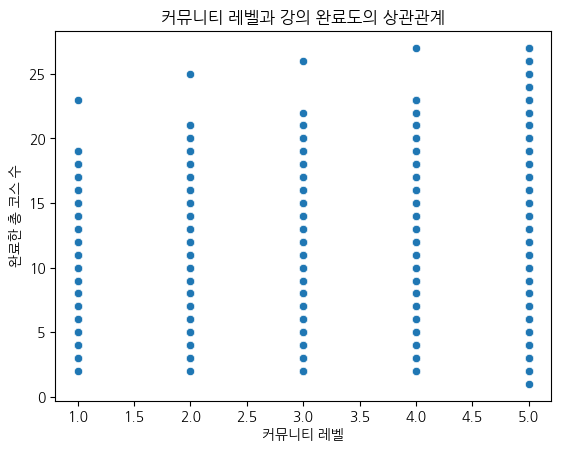

In [31]:
sns.scatterplot(x='community_engagement_level', y='total_completed_courses', data=data)
plt.title('커뮤니티 레벨과 강의 완료도의 상관관계')
plt.xlabel('커뮤니티 레벨')
plt.ylabel('완료한 총 코스 수')
plt.show()


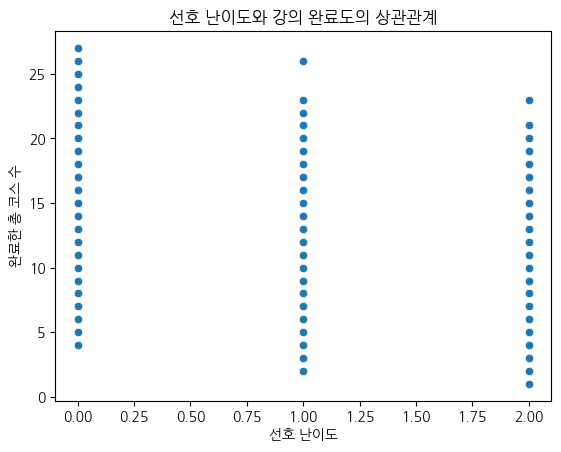

In [32]:
sns.scatterplot(x='preferred_difficulty_level', y='total_completed_courses', data=data)
plt.title('선호 난이도와 강의 완료도의 상관관계')
plt.xlabel('선호 난이도')
plt.ylabel('완료한 총 코스 수')
plt.show()


In [33]:
# 선호 난이도가 낮은데 완료한 총 코스 수가 높은 사용자 식별
low_difficulty_high_completion = data[(data['preferred_difficulty_level'] == 0) & (data['total_completed_courses'] > threshold)]

# 고객 특성 확인
print(low_difficulty_high_completion.describe())


       subscription_duration  recent_login_time  average_login_time  \
count            4992.000000        4992.000000         4992.000000   
mean               12.017428          14.957332           14.992006   
std                 6.614579           8.289661            2.996285   
min                 1.000000           1.000000            3.375170   
25%                 6.000000           8.000000           13.045105   
50%                12.000000          15.000000           15.002464   
75%                18.000000          22.000000           16.923823   
max                23.000000          29.000000           26.998490   

       average_time_per_learning_session  monthly_active_learning_days  \
count                        4992.000000                   4992.000000   
mean                           59.896421                     12.615385   
std                            60.402178                      6.937271   
min                             0.013535                      1.

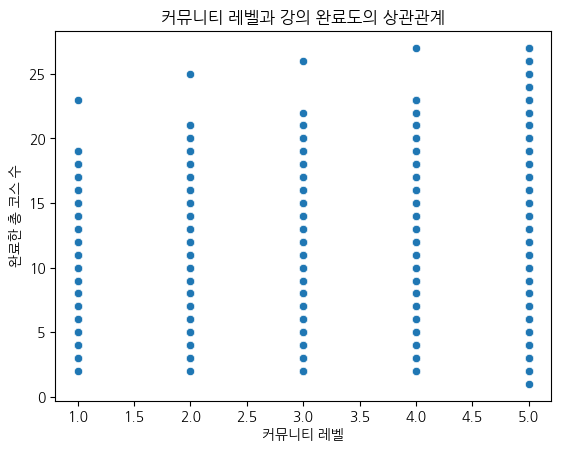

In [34]:
# 커뮤니티 레벨과 강의 완료도의 상관관계 시각화
sns.scatterplot(x='community_engagement_level', y='total_completed_courses', data=data)
plt.title('커뮤니티 레벨과 강의 완료도의 상관관계')
plt.xlabel('커뮤니티 레벨')
plt.ylabel('완료한 총 코스 수')
plt.show()


In [35]:
# 임계값 설정 (예: 완료한 총 코스 수가 5개 이하인 경우)
threshold_completion = 5


In [36]:
# 선호 난이도가 높은데 완료한 총 코스 수가 낮은 사용자 식별
high_difficulty_low_completion = data[(data['preferred_difficulty_level'] == 'High') & (data['total_completed_courses'] <= threshold_completion)]



In [37]:

# 해당 사용자들의 user_id 목록 출력
user_ids_low_completion = high_difficulty_low_completion['user_id'].tolist()
print("선호 난이도는 높지만 완료한 총 코스 수가 낮은 사용자들의 ID 목록:")
print(user_ids_low_completion)

선호 난이도는 높지만 완료한 총 코스 수가 낮은 사용자들의 ID 목록:
[]


In [38]:
import pandas as pd


In [39]:

# CSV 파일 읽기
data = pd.read_csv('mini.csv')


In [40]:

# 선호 난이도가 높은데 완료한 총 코스 수가 낮은 사용자 식별
high_difficulty_low_completion = data[(data['preferred_difficulty_level'] == 'High') & (data['total_completed_courses'] <= threshold_completion)]


In [41]:

# 해당 사용자들의 user_id 목록 출력
user_ids_low_completion = high_difficulty_low_completion['user_id']


In [42]:

# 결과를 표로 출력
user_ids_low_completion_df = pd.DataFrame(user_ids_low_completion, columns=['user_id'])
print(user_ids_low_completion_df)


       user_id
44    0fe59afd
48    3b66e70c
239   b154e450
270   14cac2b6
278   785aa01e
...        ...
9568  29844f81
9597  f83cabf0
9773  5e875c67
9827  56473bd9
9960  4ddde6d3

[87 rows x 1 columns]


In [43]:
import pandas as pd

# CSV 파일 읽기
data = pd.read_csv('mini.csv')

# 임계값 설정 (예: 완료한 총 코스 수가 5개 이하인 경우)
threshold_completion = 15

In [44]:

# 선호 난이도가 높은데 완료한 총 코스 수가 낮은 사용자 식별
high_difficulty_low_completion = data[(data['preferred_difficulty_level'] == 'High') & (data['total_completed_courses'] <= threshold_completion)]


In [45]:

# 해당 사용자들의 user_id 목록 출력
user_ids_low_completion = high_difficulty_low_completion['user_id']


In [46]:

# 해당 사용자들의 수 확인
num_users_low_completion = len(user_ids_low_completion)
print(f"선호 난이도가 높지만 완료한 총 코스 수가 낮은 사용자의 수: {num_users_low_completion}명")


선호 난이도가 높지만 완료한 총 코스 수가 낮은 사용자의 수: 1772명


In [47]:

# 결과를 표로 출력
user_ids_low_completion_df = pd.DataFrame(user_ids_low_completion, columns=['user_id'])
print(user_ids_low_completion_df)


       user_id
5     b7586b82
8     9e6713d2
10    594da7eb
12    25c57932
13    10774096
...        ...
9974  fe930c63
9980  0d22254f
9991  6ab018ed
9994  9ee4e40c
9997  e4622a54

[1772 rows x 1 columns]


In [48]:

# 결과를 CSV 파일로 저장
user_ids_low_completion_df.to_csv('users_low_completion-1.csv', index=False)
print("결과가 users_low_completion.csv 파일로 저장되었습니다.")


결과가 users_low_completion.csv 파일로 저장되었습니다.


In [49]:
# 임계값 설정 (예: 완료한 총 코스 수가 10개 이상인 경우)
threshold_completion_high_difficulty = 15


In [50]:

# 선호 난이도가 낮은데 완료한 총 코스 수가 높은 사용자 식별
low_difficulty_high_completion = data[(data['preferred_difficulty_level'] == 'Low') & (data['total_completed_courses'] >= threshold_completion_high_difficulty)]


In [51]:

# 해당 사용자들의 user_id 목록 출력
user_ids_high_completion_low_difficulty = low_difficulty_high_completion['user_id']


In [52]:

# 해당 사용자들의 수 확인
num_users_high_completion_low_difficulty = len(user_ids_high_completion_low_difficulty)
print(f"선호 난이도가 낮지만 완료한 총 코스 수가 높은 사용자의 수: {num_users_high_completion_low_difficulty}명")


선호 난이도가 낮지만 완료한 총 코스 수가 높은 사용자의 수: 1750명


In [53]:
unique_users = data['user_id'].nunique()
print(f"데이터에 포함된 고유한 회원 수: {unique_users}명")


데이터에 포함된 고유한 회원 수: 10000명


In [54]:
user_ids_high_completion_low_difficulty_df = pd.DataFrame(user_ids_high_completion_low_difficulty, columns=['user_id'])
print(user_ids_high_completion_low_difficulty_df)

       user_id
0     b919c29d
3     5dc0ba8b
7     8c948022
19    c8d9c81f
21    c85a61b6
...        ...
9971  f23bf8d4
9981  3c87381d
9982  0b2cb82c
9990  365dc677
9995  ae6b76bc

[1750 rows x 1 columns]


In [55]:
user_ids_high_completion_low_difficulty_df.to_csv('users_high_completion_low_difficulty.csv', index=False)
print("결과가 users_high_completion_low_difficulty.csv 파일로 저장되었습니다.")

결과가 users_high_completion_low_difficulty.csv 파일로 저장되었습니다.


In [56]:
access_data.target.value_counts()

target
1    6199
0    3801
Name: count, dtype: int64